# Slask

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load CSV
data = pd.read_csv("recruitment_data.csv")

# Features (X) and target (y)
X = data.drop("HiringDecision", axis=1)
y = data["HiringDecision"]

# Train/test split (30% test since small dataset)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
log_reg = LogisticRegression(class_weight="balanced", random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

# Random Forest
rf = RandomForestClassifier(
    class_weight="balanced", random_state=42, n_estimators=100
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
print("=== Logistic Regression Report ===")
print(classification_report(y_test, y_pred_log))

print("=== Random Forest Report ===")
print(classification_report(y_test, y_pred_rf))


=== Logistic Regression Report ===
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       207
           1       0.71      0.81      0.75        93

    accuracy                           0.84       300
   macro avg       0.81      0.83      0.82       300
weighted avg       0.85      0.84      0.84       300

=== Random Forest Report ===
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       207
           1       0.95      0.80      0.87        93

    accuracy                           0.92       300
   macro avg       0.93      0.89      0.91       300
weighted avg       0.93      0.92      0.92       300



In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier

df = data.copy()

# Features och target
X = df.drop("HiringDecision", axis=1)
y = df["HiringDecision"]

# Train/test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardisering av numeriska features (kan vara viktigt för vissa modeller, men RF klarar sig utan)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Träna en Random Forest som startmodell
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Prediktion
y_pred = rf_model.predict(X_test_scaled)

# Utvärdering
results = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "F1-Score": f1_score(y_test, y_pred),
    "ClassificationReport": classification_report(y_test, y_pred, output_dict=True)
}

print("Random Forest Results:")
print(f"Accuracy: {results['Accuracy']:.4f}")
print(f"F1-Score: {results['F1-Score']:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Random Forest Results:
Accuracy: 0.9433
F1-Score: 0.9040
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       207
           1       0.95      0.86      0.90        93

    accuracy                           0.94       300
   macro avg       0.95      0.92      0.93       300
weighted avg       0.94      0.94      0.94       300



In [ ]:
df = data.copy()



C:\Users\hugom\AppData\Local\Temp\ipykernel_27968\140564960.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_data = df.groupby(['RecruitmentStrategy', 'Gender', 'HiringDecision']).size().unstack(fill_value=0)


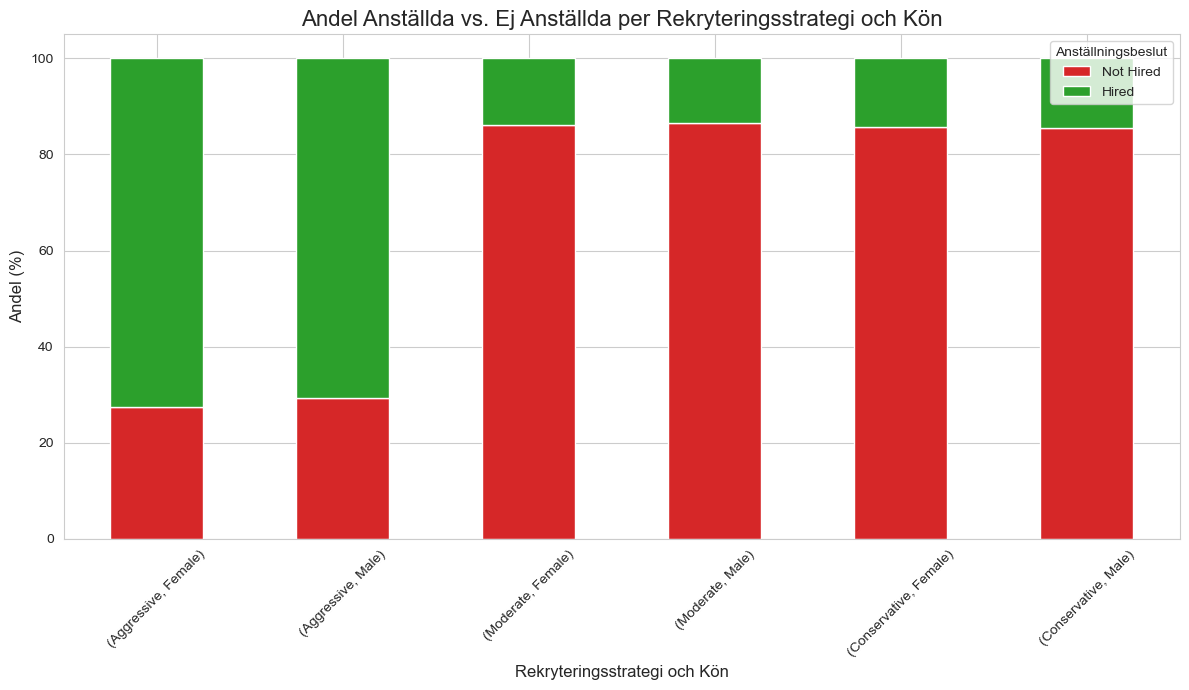

Koden har skapat en grupperad stapeldiagram som visualserar din begäran.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Läs in rådata
df = pd.read_csv("recruitment_data.csv")
df.dropna(inplace=True)

# Mappar numeriska koder till kategorier
df['RecruitmentStrategy'] = df['RecruitmentStrategy'].astype('category').cat.rename_categories({1: 'Aggressive', 2: 'Moderate', 3: 'Conservative'})
df['Gender'] = df['Gender'].astype('category').cat.rename_categories({0: 'Female', 1: 'Male'})
df['HiringDecision'] = df['HiringDecision'].astype('category').cat.rename_categories({0: 'Not Hired', 1: 'Hired'})

# Beräkna andelen anställda per strategi, uppdelat per kön
# Vi skapar en pivot-tabell för att aggregera data
plot_data = df.groupby(['RecruitmentStrategy', 'Gender', 'HiringDecision']).size().unstack(fill_value=0)
plot_data['Total'] = plot_data.sum(axis=1)
plot_data_normalized = plot_data.div(plot_data['Total'], axis=0).drop('Total', axis=1) * 100

# Skapa den grupperade stapeldiagrammet
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")
plot_data_normalized.plot(kind='bar', stacked=True, color=['#d62728', '#2ca02c'], ax=plt.gca())

# Anpassa grafen
plt.title('Andel Anställda vs. Ej Anställda per Rekryteringsstrategi och Kön', fontsize=16)
plt.xlabel('Rekryteringsstrategi och Kön', fontsize=12)
plt.ylabel('Andel (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Anställningsbeslut', loc='upper right')
plt.tight_layout()
plt.show()

print("Koden har skapat en grupperad stapeldiagram som visualserar din begäran.")